In [1]:
import numpy as np

from matplotlib.pyplot import subplots, cm 

import sklearn.model_selection as skm
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay

from ISLP import load_data , confusion_table
from ISLP.svm import plot as plot_svm

In [2]:
roc_curve = RocCurveDisplay.from_estimator # shorthand

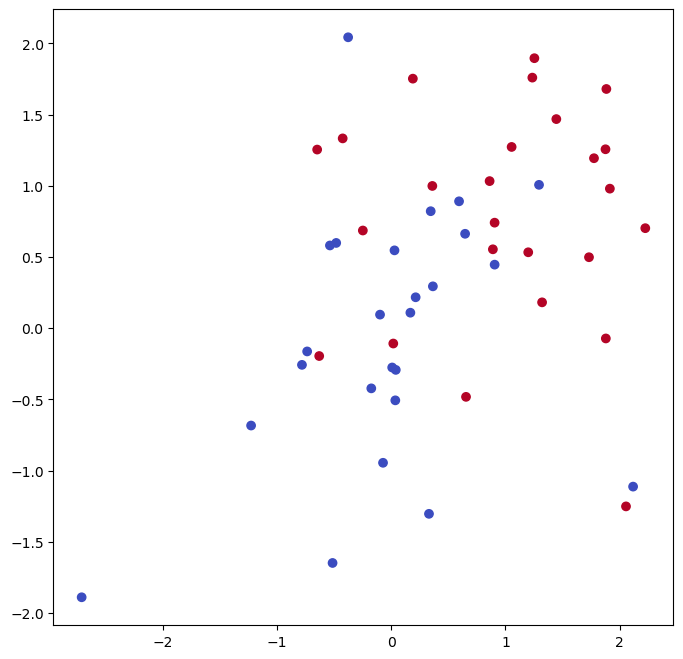

In [4]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2)) 
Y = np.array([-1]*25+[1]*25) 

X[Y==1] += 1

fig, ax = subplots(figsize=(8,8))

ax.scatter(X[:,0], X[:,1],c=Y, cmap=cm.coolwarm);

In [5]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, Y)

SVC(C=10, kernel='linear')

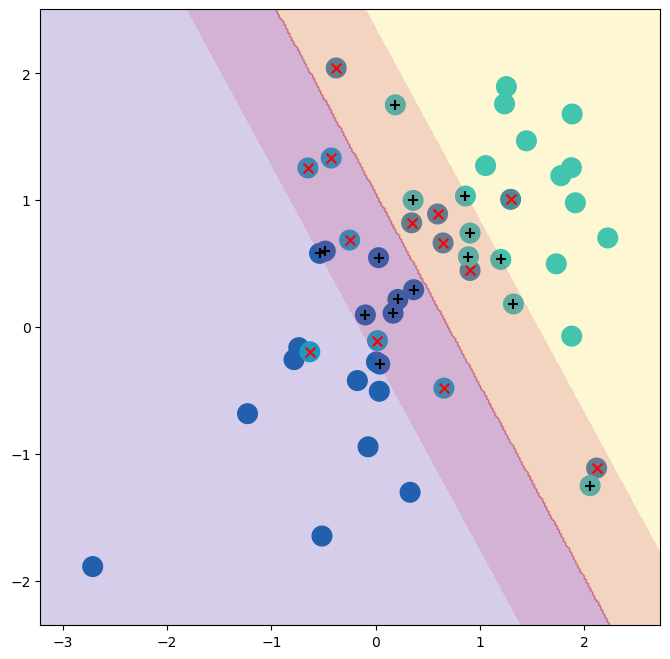

In [6]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X, Y, svm_linear , ax=ax)

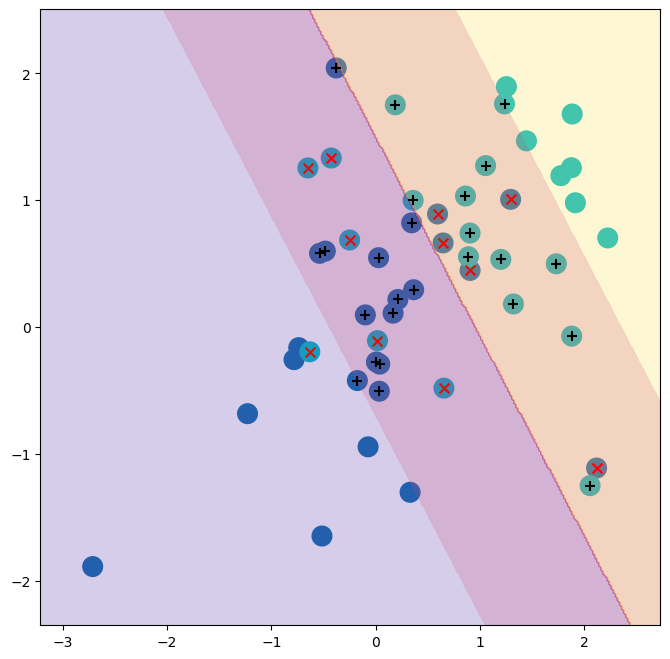

In [7]:
svm_linear_small = SVC(C=0.1, kernel='linear') 
svm_linear_small.fit(X, Y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X, Y, svm_linear_small , ax=ax)

Small cost parameter, large number of support vectors

In [9]:
#Extraction of coefficients of linear decision boundary
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [10]:
kfold = skm.KFold(5, random_state=0,shuffle=True) 
grid = skm.GridSearchCV(svm_linear, {'C':[0.001,0.01,0.1,1,5,10,100]}, refit=True, cv=kfold, scoring='accuracy')
grid.fit(X, Y) 
grid.best_params_

{'C': 1}

In [11]:
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [12]:
X_test = rng.standard_normal((20, 2)) 
Y_test = np.array([-1]*10+[1]*10) 
X_test[Y_test==1] += 1

In [14]:
best_ = grid.best_estimator_
Y_test_hat = best_.predict(X_test)
confusion_table(Y_test_hat, Y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


In [16]:
svm_ = SVC(C=0.001, kernel='linear').fit(X, Y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat, Y_test)

Truth,-1,1
Predicted,,
-1,2,0
1,8,10


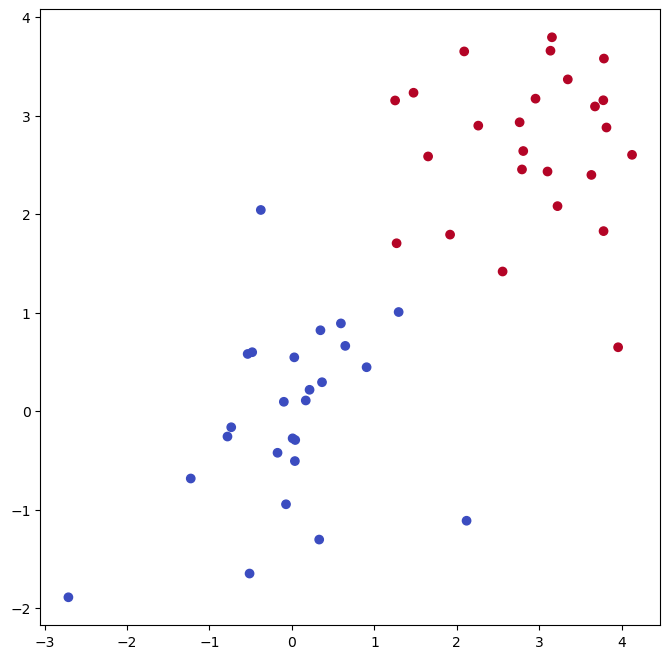

In [18]:
X[Y==1] += 1.9;
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=Y, cmap=cm.coolwarm);

In [19]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, Y) 
y_hat = svm_.predict(X) 
confusion_table(y_hat, Y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


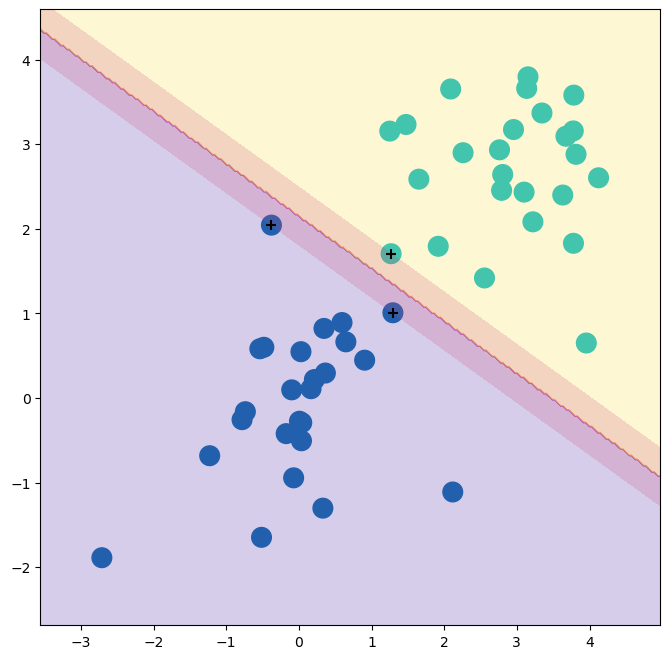

In [21]:
fig, ax = subplots(figsize=(8,8)) 
plot_svm(X, Y, svm_ , ax=ax)

In [22]:
svm_ = SVC(C=0.1, kernel='linear').fit(X, Y) 
y_hat = svm_.predict(X) 
confusion_table(y_hat, Y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


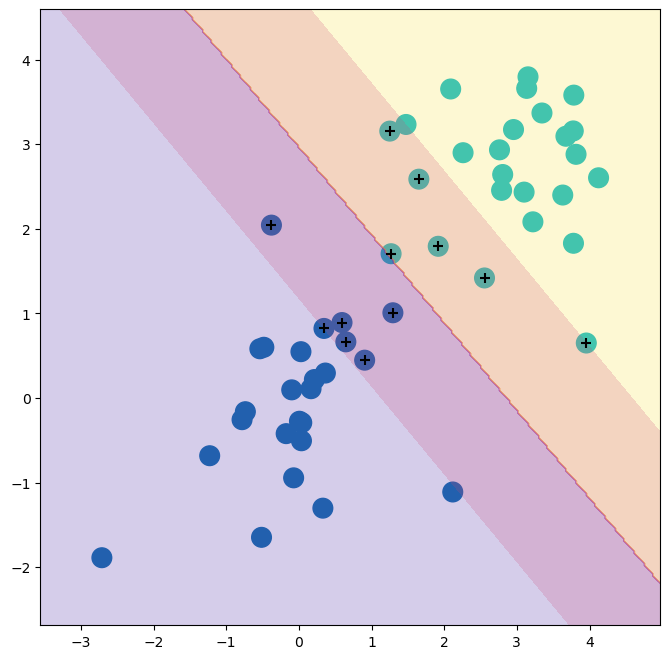

In [23]:
fig, ax = subplots(figsize=(8,8)) 
plot_svm(X, Y, svm_ , ax=ax)

## Support Vector Machine

In [27]:
X = rng.standard_normal((200, 2)) 
X[:100] += 2
X[100:150] -= 2
Y = np.array([1]*150+[2]*50)

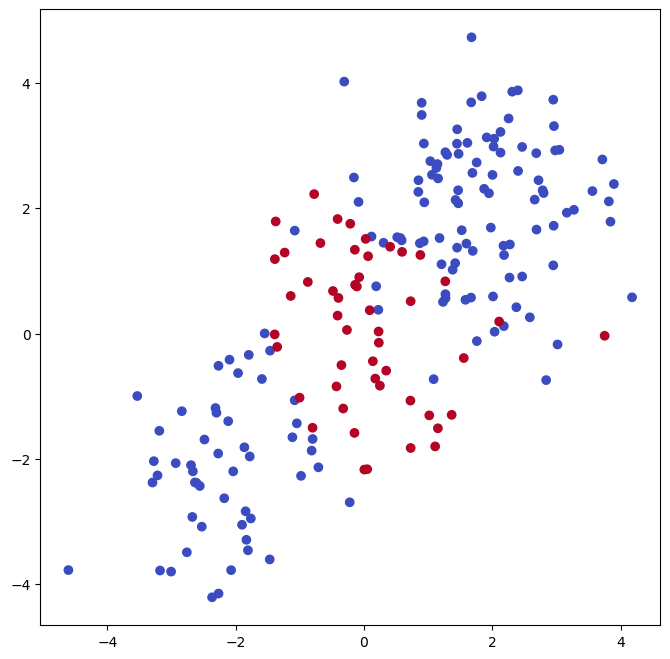

In [28]:
fig, ax = subplots(figsize=(8,8)) 
ax.scatter(X[:,0], X[:,1], c=Y, cmap=cm.coolwarm)

In [29]:
(X_train, X_test, Y_train, Y_test) = skm.train_test_split(X, Y, test_size=0.5, random_state=0) 
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train, Y_train)

SVC(C=1, gamma=1)

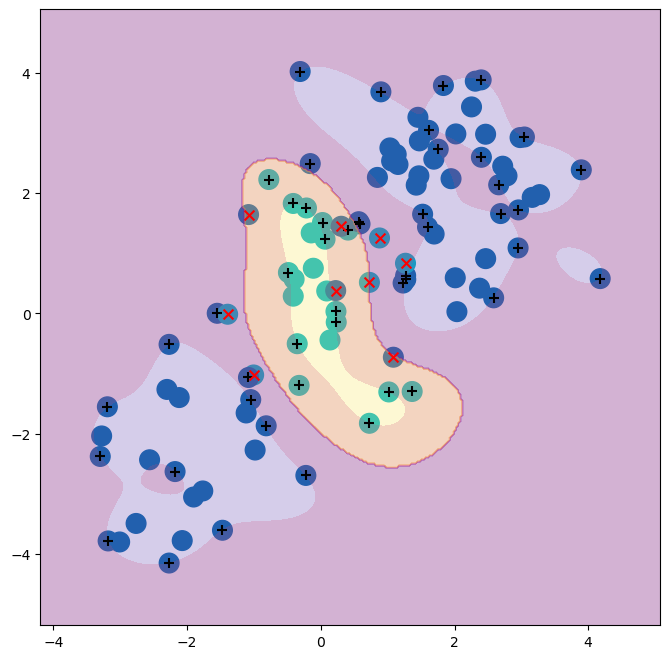

In [30]:
fig, ax = subplots(figsize=(8,8)) 
plot_svm(X_train, Y_train , svm_rbf , ax=ax)

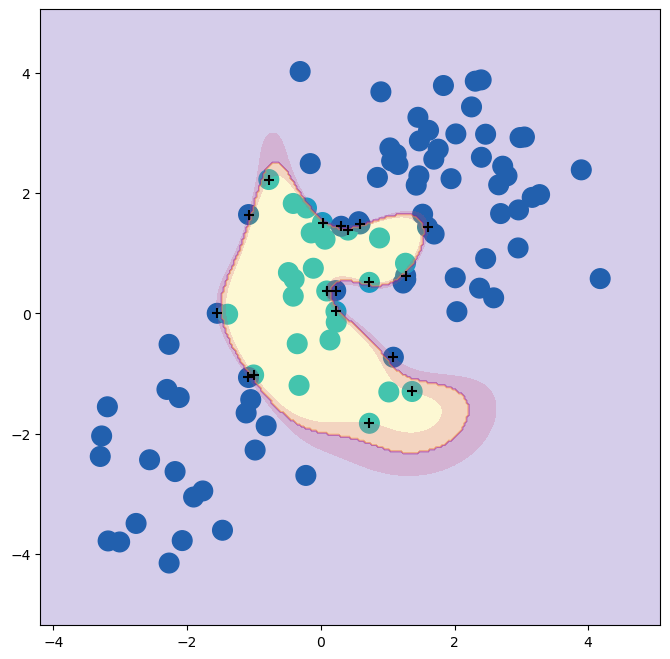

In [31]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train, Y_train)
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train, Y_train , svm_rbf , ax=ax)

In [33]:
kfold = skm.KFold(5, random_state=0, shuffle=True) 
grid = skm.GridSearchCV(svm_rbf, {'C':[0.1,1,10,100,1000], 'gamma':[0.5,1,2,3,4]}, refit=True, cv=kfold, scoring='accuracy');
grid.fit(X_train, Y_train) 
grid.best_params_

{'C': 100, 'gamma': 1}

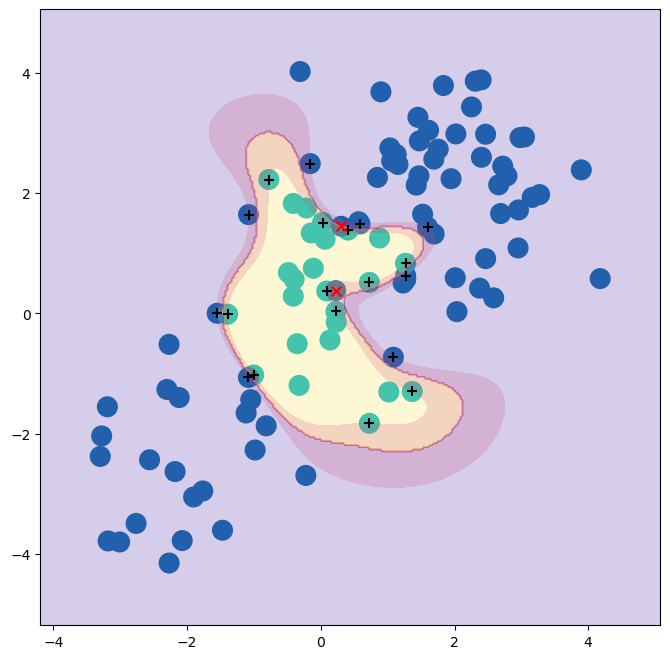

In [34]:
best_svm = grid.best_estimator_ 
fig, ax = subplots(figsize=(8,8)) 
plot_svm(X_train, Y_train , best_svm , ax=ax)

In [36]:
y_hat_test = best_svm.predict(X_test) 
confusion_table(y_hat_test, Y_test)

Truth,1,2
Predicted,,
1,70,9
2,5,16


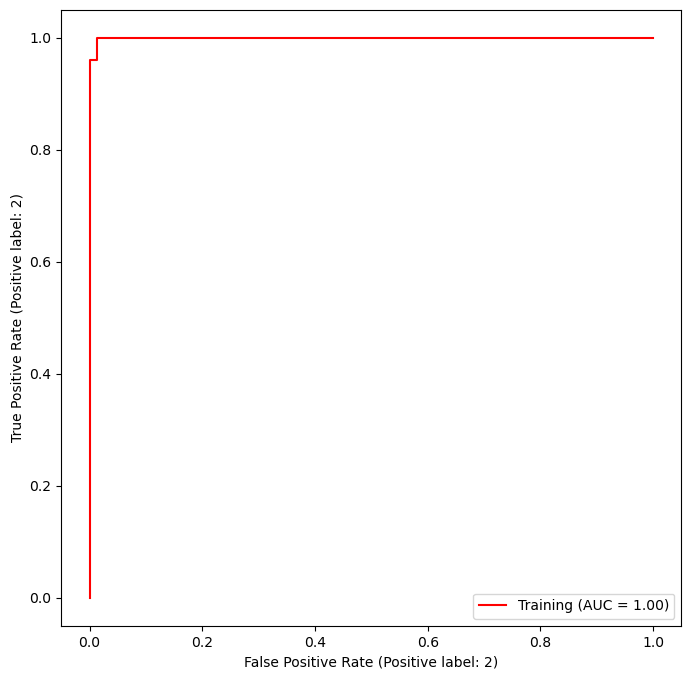

In [37]:
fig, ax = subplots(figsize=(8,8)) 
roc_curve(best_svm, X_train , Y_train , name='Training', color='r', ax=ax);

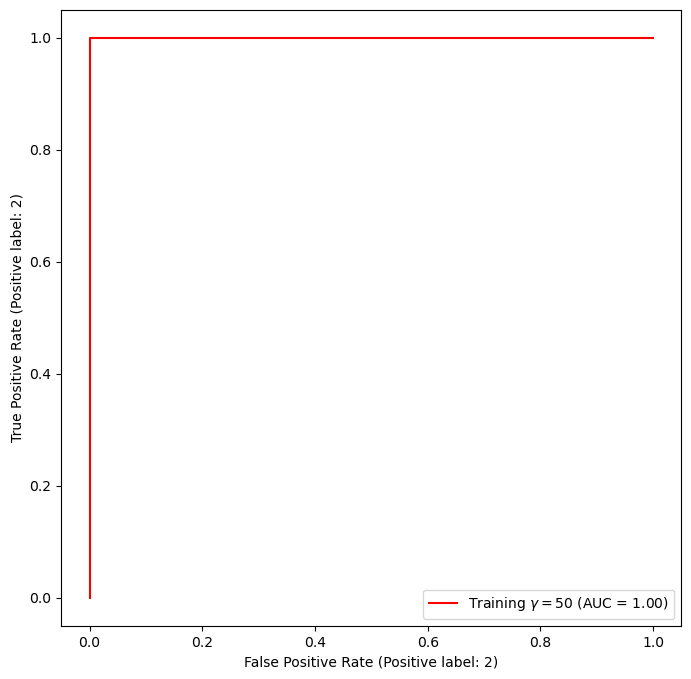

In [38]:
svm_flex = SVC(kernel="rbf", gamma=50, C=1)
svm_flex.fit(X_train, Y_train)
fig, ax = subplots(figsize=(8,8)) 
roc_curve(svm_flex, X_train , Y_train, name='Training $\gamma=50$', color='r', ax=ax);

In [39]:
roc_curve(svm_flex, X_test , Y_test, name='Test $\gamma=50$', color='b', ax=ax)
fig;

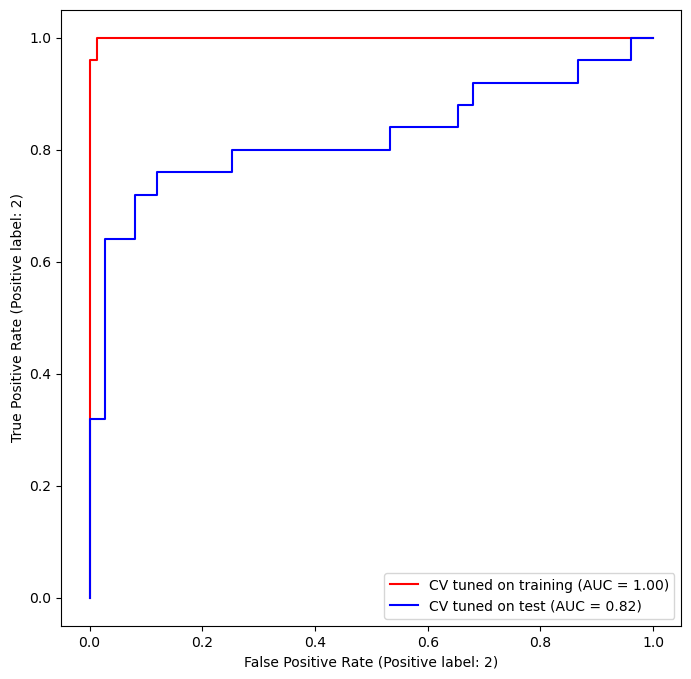

In [40]:
fig, ax = subplots(figsize=(8,8)) 
for (X_, y_, c, name) in zip( (X_train, X_test), (Y_train, Y_test), ('r', 'b'), 
                             ('CV tuned on training', 'CV tuned on test')): 
    roc_curve(best_svm, X_, y_, name=name, ax=ax, color=c)

In [46]:
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50, 2))]) 
Y = np.hstack([Y, [0]*50])
#X[Y==0,1] += 2
#fig, ax = subplots(figsize=(8,8))
#ax.scatter(X[:,0], X[:,1], c=Y, cmap=cm.coolwarm);

In [48]:
svm_rbf_3 = SVC(kernel="rbf", C=10, gamma=1, decision_function_shape='ovo'); 
#svm_rbf_3.fit(X, y)
#fig, ax = subplots(figsize=(8,8)) 
#plot_svm(X, y, svm_rbf_3 , scatter_cmap=cm.tab10, ax=ax)

In [49]:
Khan = load_data('Khan') 
Khan['xtrain'].shape, Khan['xtest'].shape

((63, 2308), (20, 2308))

In [56]:
khan_linear = SVC(kernel='linear', C=10) 
khan_linear.fit(Khan['xtrain'], Khan['ytrain'])
confusion_table(khan_linear.predict(Khan['xtrain']),Khan['ytrain'])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [57]:
confusion_table(khan_linear.predict(Khan['xtest']), Khan['ytest'])

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5
